In [1]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from tensorflow.keras.callbacks import TensorBoard

/home/jasonchandatascience/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/jasonchandatascience/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [3]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [6]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 126.7 MB


In [13]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [14]:
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

### Impute NaNs using mean of columns

In [18]:
df = df.fillna(df.mean())

In [19]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

### Resampling of Global_active_power
to convert the frequency of time series. From every minute to every day. Using mean or sum. Must have similar structure

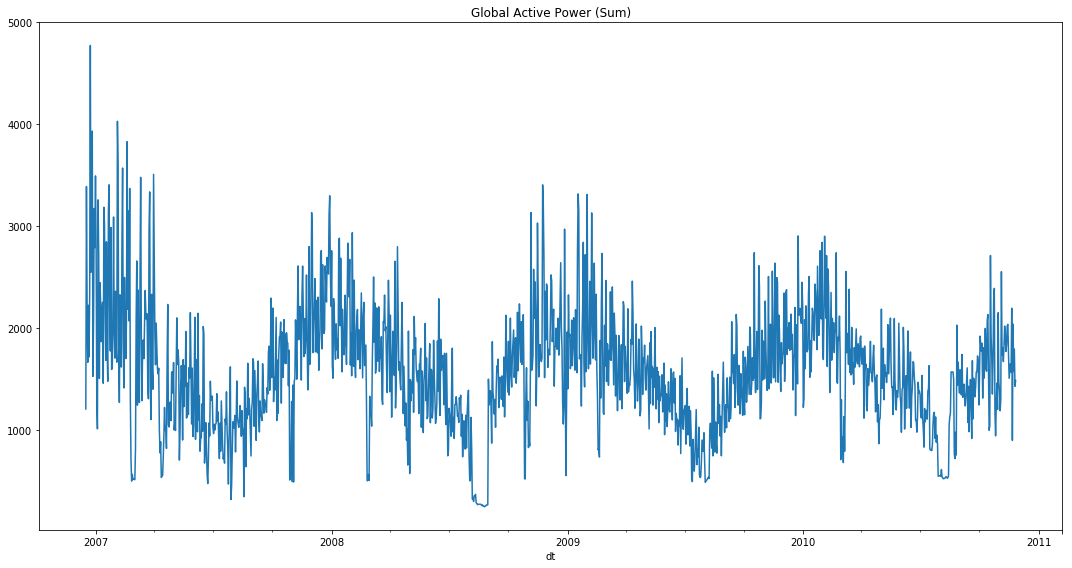

In [39]:
plt.subplots(figsize=(15, 8))
df.Global_active_power.resample('D').sum().plot(title = "Global Active Power (Sum)" )
plt.tight_layout()
plt.show()

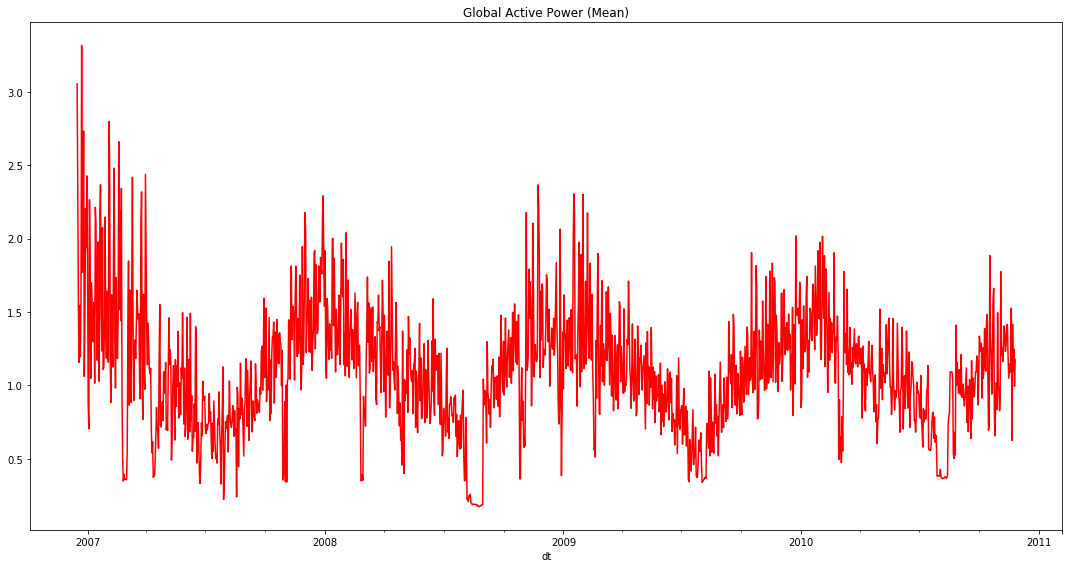

In [40]:
plt.subplots(figsize=(15, 8))
df.Global_active_power.resample('D').mean().plot(title = "Global Active Power (Mean)", color="red")
plt.tight_layout()
plt.show()

### Mean and std of Global_intensity resampled over a day

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3fb729240>,
      dtype=object)

<Figure size 1080x576 with 0 Axes>

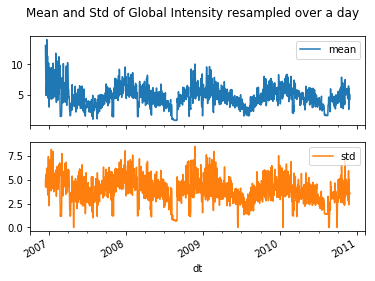

In [46]:
plt.figure(figsize=(15, 8))
r = df.Global_intensity.resample('D').agg(['mean', 'std'])
r.plot(subplots=True, title = "Mean and Std of Global Intensity resampled over a day")

### Resampling of Global Reactive Power

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4011d6cf8>,
      dtype=object)

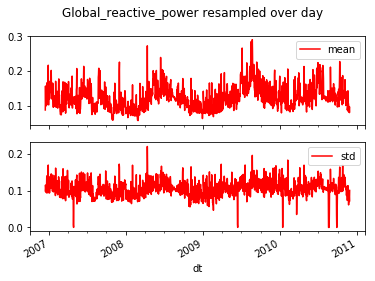

In [29]:
r2 = df.Global_reactive_power.resample('D').agg(['mean', 'std'])
r2.plot(subplots = True, title='Global_reactive_power resampled over day', color='red')

Text(0.5,1,'Global_active_power per month (averaged over month)')

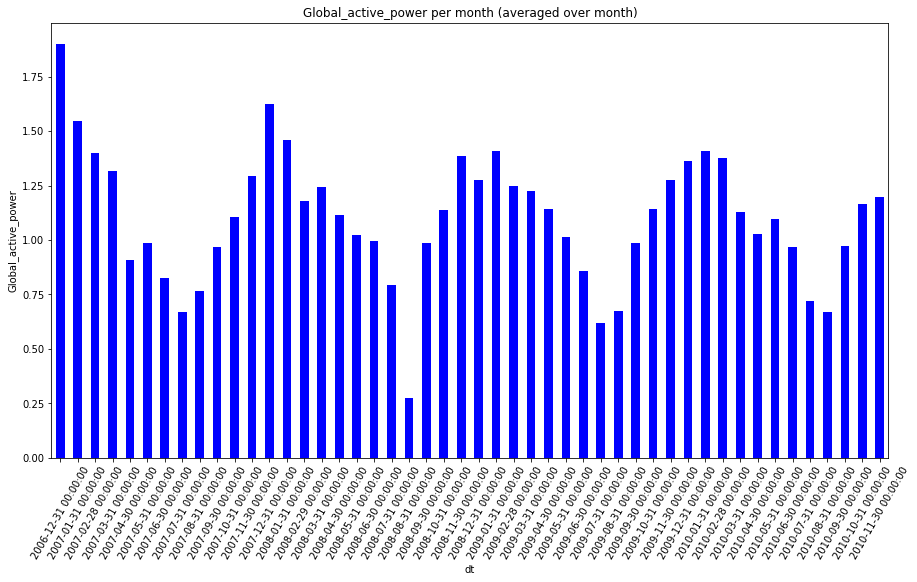

In [44]:
# over month
# Sum of 'Global_active_power' resampled over month
plt.subplots(figsize=(15, 8))
df['Global_active_power'].resample('M').mean().plot(kind='bar', color="blue")
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per month (averaged over month)')

Text(0.5,1,'Global_active_power per quarter (averaged over quarter)')

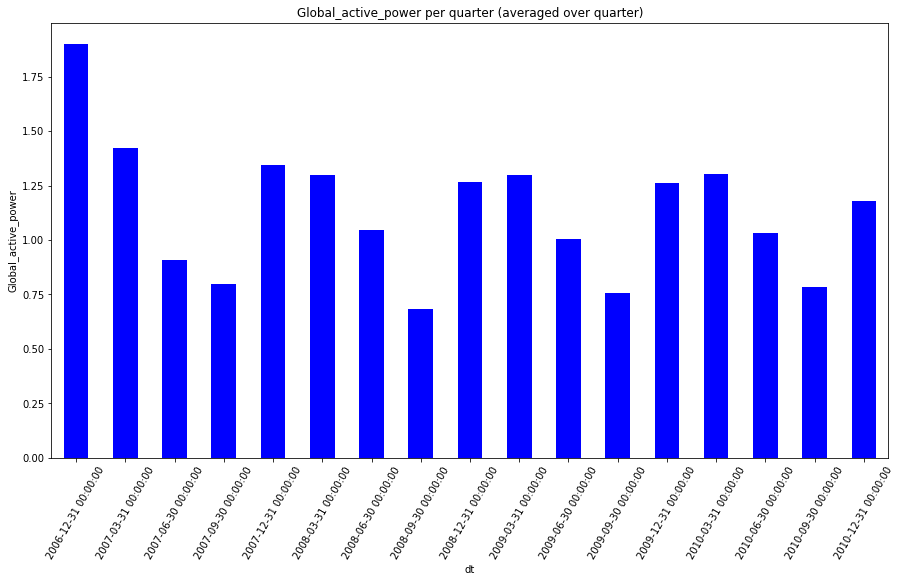

In [45]:
## Mean of 'Global_active_power' resampled over quarter
plt.subplots(figsize=(15, 8))
df['Global_active_power'].resample('Q').mean().plot(kind='bar', color ="blue")
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per quarter (averaged over quarter)')

Text(0.5,1,'Voltage per quarter (summed over quarter)')

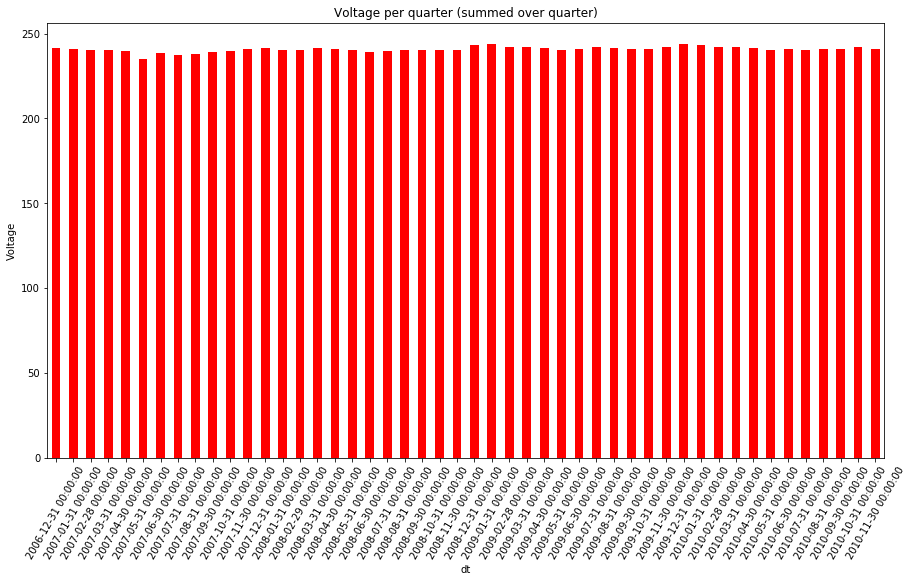

In [38]:
## mean of 'Voltage' resampled over month
plt.subplots(figsize=(15, 8))
df['Voltage'].resample('M').mean().plot(kind='bar', color='red')
plt.xticks(rotation=60)
plt.ylabel('Voltage')
plt.title('Voltage per quarter (summed over quarter)')

It is very important to note from above two plots that **resampling over larger time inteval, will diminish the periodicity** of system as we expect. This is important for machine learning **feature engineering**

### Sub-metering 1

Text(0.5,1,'Sub_metering_1 per month (mean over month)')

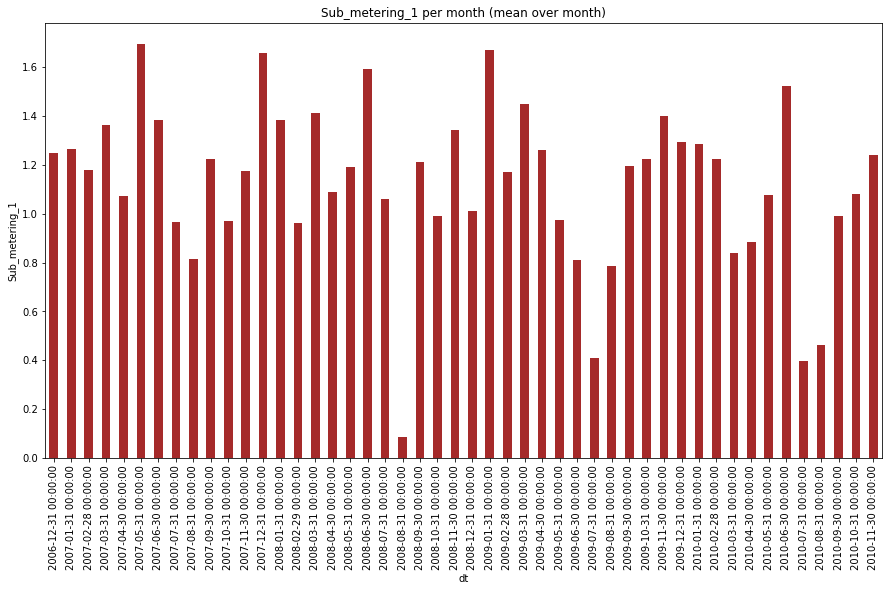

In [37]:
plt.subplots(figsize=(15, 8))
df['Sub_metering_1'].resample('M').mean().plot(kind='bar', color='brown')
plt.xticks(rotation=90)
plt.ylabel('Sub_metering_1')
plt.title('Sub_metering_1 per month (mean over month)')

It is seen from the above plots that the mean of **'Volage'** over month is pretty much constant compared to other features. **This is important again in feature selection.**

### Means of all columns resampled over day

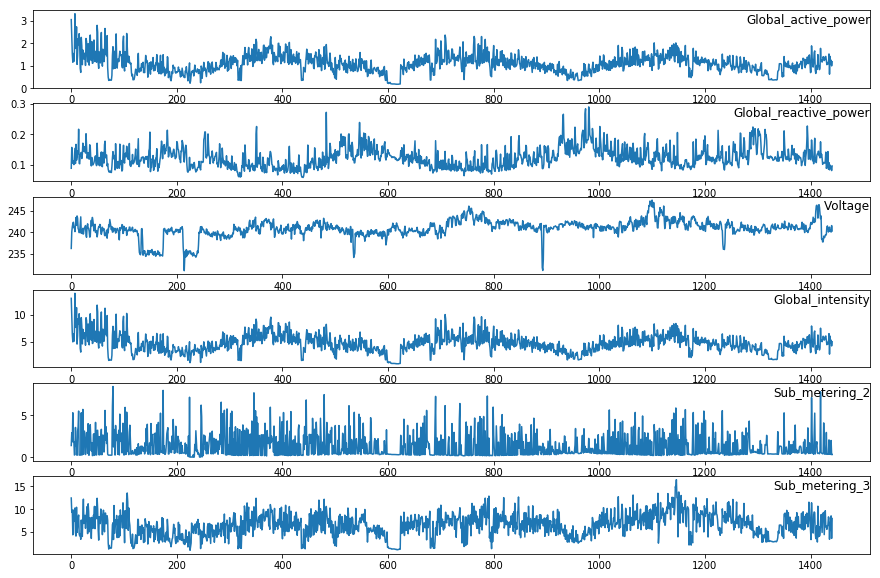

In [47]:
# Below I compare the mean of different featuresresampled over day. 
# specify columns to plot
cols = [0, 1, 2, 3, 5, 6]
i = 1
groups=cols
values = df.resample('D').mean().values
# plot each column
plt.figure(figsize=(15, 10))
for group in groups:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.75, loc='right')
	i += 1
plt.show()

### Resampling over week and computing mean

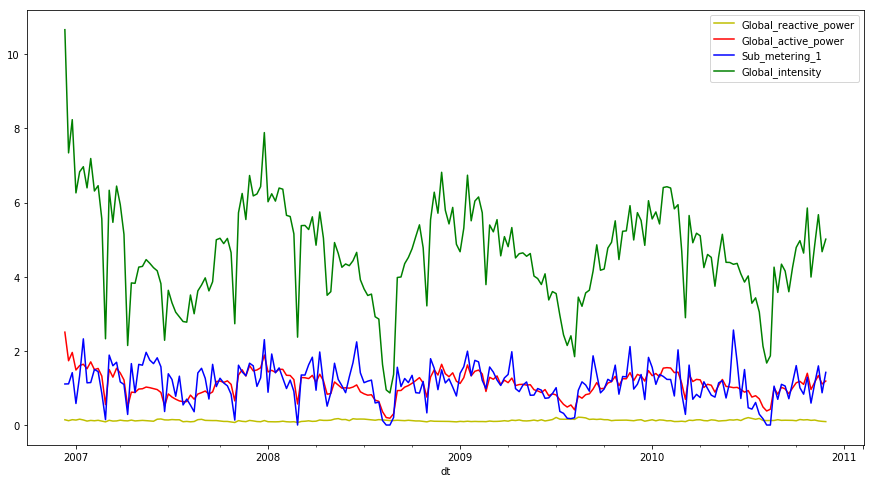

In [50]:
## resampling over week and computing mean
plt.subplots(figsize=(15,8))
df.Global_reactive_power.resample('W').mean().plot(color='y', legend=True)
df.Global_active_power.resample('W').mean().plot(color='r', legend=True)
df.Sub_metering_1.resample('W').mean().plot(color='b', legend=True)
df.Global_intensity.resample('W').mean().plot(color='g', legend=True)
plt.show()

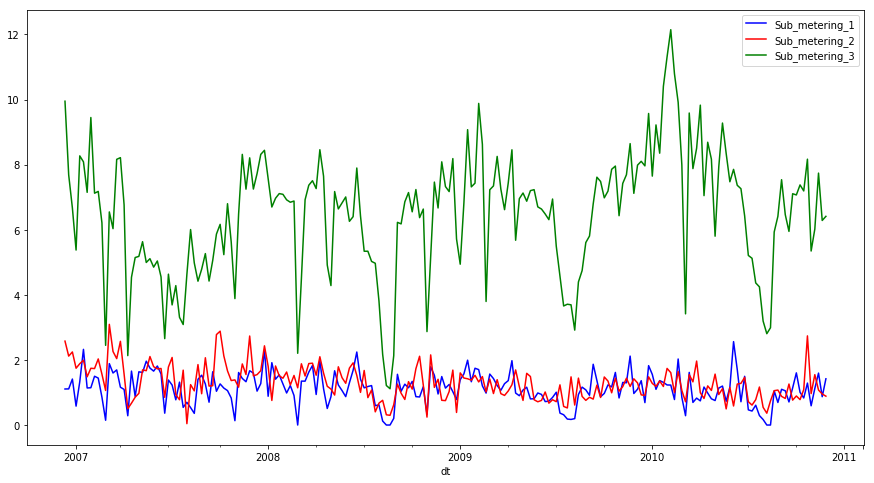

In [51]:
## resampling over week and computing mean
plt.subplots(figsize=(15,8))
df.Sub_metering_1.resample('W').mean().plot(color='b', legend=True)
df.Sub_metering_2.resample('W').mean().plot(color='r', legend=True)
df.Sub_metering_3.resample('W').mean().plot(color='g', legend=True)

plt.show()